## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from feature_engine.datetime import DatetimeFeatures

## Settings

In [2]:
pd.set_option("display.max_columns", None)
sklearn.set_config(transform_output='default')

## Loading Data

In [3]:
train_df = pd.read_csv(r'data\training.csv')
val_df = pd.read_csv(r'data\validation.csv')
test_df = pd.read_csv(r'data\testing.csv')

In [4]:
train_df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Air Asia,2019-03-09,Delhi,Cochin,2025-04-26 20:10:00,2025-03-10 07:10:00,660,1.0,No info,8327
1,Jet Airways,2019-05-18,Kolkata,Banglore,2025-04-26 17:00:00,2025-04-26 23:35:00,395,1.0,No info,14151
2,Jet Airways,2019-05-18,Kolkata,Banglore,2025-04-26 08:25:00,2025-04-26 22:35:00,850,1.0,In-flight meal not included,10844
3,IndiGo,2019-05-15,Delhi,Cochin,2025-04-26 06:40:00,2025-04-26 21:00:00,860,1.0,No info,7191
4,Jet Airways,2019-05-06,Banglore,Delhi,2025-04-26 08:20:00,2025-04-26 11:20:00,180,0.0,In-flight meal not included,4544
...,...,...,...,...,...,...,...,...,...,...
8365,IndiGo,2019-06-03,Banglore,Delhi,2025-04-26 08:30:00,2025-04-26 11:20:00,170,0.0,No info,4823
8366,Jet Airways,2019-03-21,Banglore,New Delhi,2025-04-26 07:00:00,2025-04-26 21:20:00,860,1.0,In-flight meal not included,7832
8367,IndiGo,2019-04-03,Delhi,Cochin,2025-04-26 10:35:00,2025-04-26 15:35:00,300,1.0,No info,5073
8368,IndiGo,2019-04-27,Delhi,Cochin,2025-04-26 05:35:00,2025-04-26 08:50:00,195,0.0,No info,6015


## Splitting 

In [5]:
def split_data(data):
    x = data.drop(columns='Price')
    y = data.Price.copy()

    return x, y

In [6]:
x_train, y_train = split_data(train_df)

In [7]:
x_train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Air Asia,2019-03-09,Delhi,Cochin,2025-04-26 20:10:00,2025-03-10 07:10:00,660,1.0,No info
1,Jet Airways,2019-05-18,Kolkata,Banglore,2025-04-26 17:00:00,2025-04-26 23:35:00,395,1.0,No info
2,Jet Airways,2019-05-18,Kolkata,Banglore,2025-04-26 08:25:00,2025-04-26 22:35:00,850,1.0,In-flight meal not included
3,IndiGo,2019-05-15,Delhi,Cochin,2025-04-26 06:40:00,2025-04-26 21:00:00,860,1.0,No info
4,Jet Airways,2019-05-06,Banglore,Delhi,2025-04-26 08:20:00,2025-04-26 11:20:00,180,0.0,In-flight meal not included
...,...,...,...,...,...,...,...,...,...
8365,IndiGo,2019-06-03,Banglore,Delhi,2025-04-26 08:30:00,2025-04-26 11:20:00,170,0.0,No info
8366,Jet Airways,2019-03-21,Banglore,New Delhi,2025-04-26 07:00:00,2025-04-26 21:20:00,860,1.0,In-flight meal not included
8367,IndiGo,2019-04-03,Delhi,Cochin,2025-04-26 10:35:00,2025-04-26 15:35:00,300,1.0,No info
8368,IndiGo,2019-04-27,Delhi,Cochin,2025-04-26 05:35:00,2025-04-26 08:50:00,195,0.0,No info


In [8]:
y_train

0        8327
1       14151
2       10844
3        7191
4        4544
        ...  
8365     4823
8366     7832
8367     5073
8368     6015
8369     3543
Name: Price, Length: 8370, dtype: int64

In [9]:
x_val, y_val = split_data(val_df)
print(x_val.shape, y_val.shape)

(1883, 10) (1883,)


In [10]:
x_test, y_test = split_data(test_df)
print(x_test.shape, y_test.shape)

(210, 9) (210,)


## Info

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          8370 non-null   object 
 1   Date_of_Journey  8370 non-null   object 
 2   Source           8370 non-null   object 
 3   Destination      8370 non-null   object 
 4   Dep_Time         8370 non-null   object 
 5   Arrival_Time     8370 non-null   object 
 6   Duration         8370 non-null   int64  
 7   Total_Stops      8369 non-null   float64
 8   Additional_Info  8370 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 588.6+ KB


## Data Processing

In [12]:
datetime_columns = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
numeric_columns = ['Duration', 'Total_Stops']
categorical_columns = ['Airline', 'Source', 'Destination', 'Additional_Info']


In [13]:
doj_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("extractor", DatetimeFeatures(features_to_extract=['week', 'day_of_week', 'month', 'day_of_month'], format='mixed')),
    ("scaler", StandardScaler())
])
time_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("extractor", DatetimeFeatures(features_to_extract=['hour', 'minute'], format='mixed')),
    ("scaler", StandardScaler())
])
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [14]:
preprocessors = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numeric_columns),
    ('categorical', categorical_transformer, categorical_columns),
    ('doj', doj_transformer, ['Date_of_Journey']),
    ('time', time_transformer, ['Dep_Time', 'Arrival_Time'])
])

In [15]:
preprocessors.fit_transform(x_train)

array([[ 0.05721784,  0.29742133,  1.        , ..., -0.76663974,
        -0.92657577, -0.88571566],
       [-0.47147211,  0.29742133,  0.        , ..., -1.29800565,
         1.40882835,  0.62562742],
       [ 0.43627855,  0.29742133,  0.        , ...,  0.03040911,
         1.26286559,  0.62562742],
       ...,
       [-0.66100247,  0.29742133,  0.        , ...,  0.56177502,
         0.24112629,  0.62562742],
       [-0.87048339, -1.21572099,  0.        , ...,  0.56177502,
        -0.78061301,  1.53243327],
       [-0.99018677, -1.21572099,  0.        , ...,  1.09314092,
        -0.19676198, -1.4902529 ]], shape=(8370, 43))

## Model Selection

In [16]:
algorithms = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(),
    "Random Forest": RandomForestRegressor(n_estimators=10),
    "XG Boost": XGBRegressor(n_estimators=10)
}

In [17]:
data = pd.concat([train_df, val_df], axis=0)

x_data, y_data = split_data(data)


In [18]:
def plot_curves(sizes, mean_scores, std_scores, label, axis):
    axis.plot(sizes, mean_scores, marker='o', label=label)
    axis.fill_between(x=sizes, y1=mean_scores-std_scores, y2=mean_scores+std_scores, alpha=0.5)

In [19]:
def plot_learning_curves(algo_name, algorithm, figsize=(12, 4)):
    model = Pipeline(steps=[
        ("preprocessor", preprocessors),
        ("algorithm", algorithm)
    ])

    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=x_data, y=y_data, cv=3, scoring='r2', n_jobs=-1, random_state=42)

    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

    mean_test_scores = np.mean(test_scores, axis=1)
    std_test_scores = np.std(test_scores, axis=1)
    test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

    figure, axis = plt.subplots(figsize=figsize)

    # training curve
    plot_curves(train_sizes, mean_train_scores, std_train_scores, f"Train ({train_score})", axis)
    
    # test curve
    plot_curves(train_sizes, mean_test_scores, std_test_scores, f"Test ({test_score})", axis)

    axis.set(xlabel="Training Set Sizes", ylabel="R-squared", title=algo_name)
    axis.legend(loc="lower right")

    plt.show()

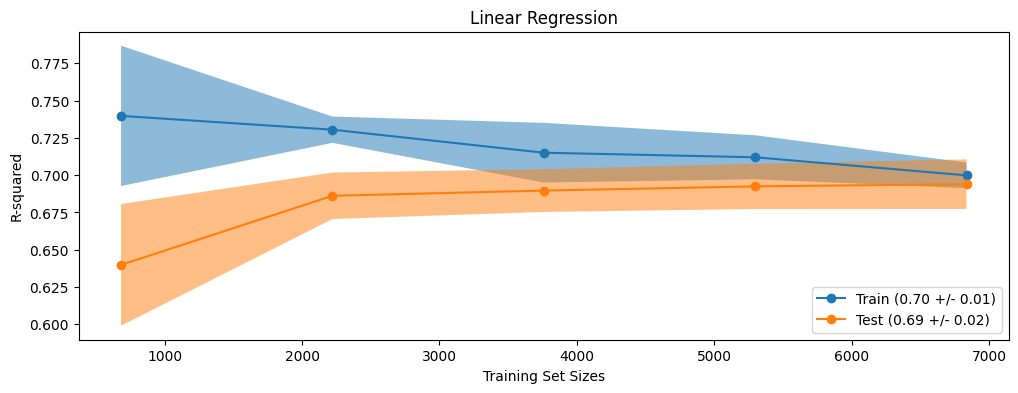

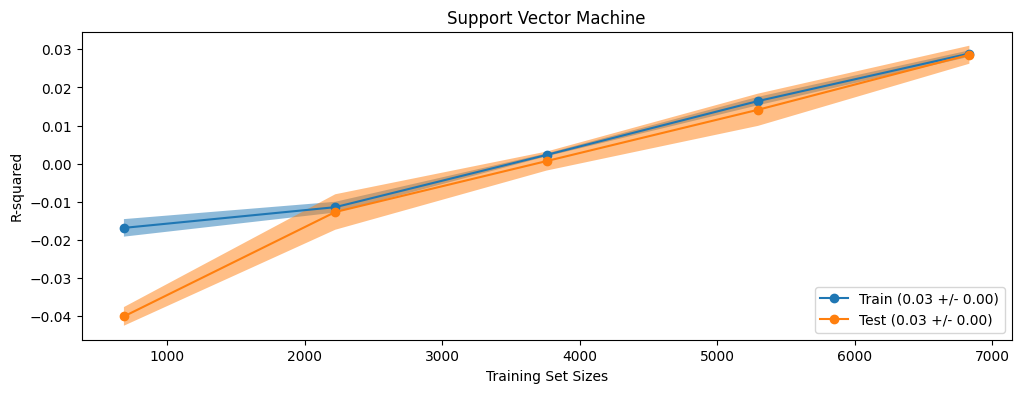

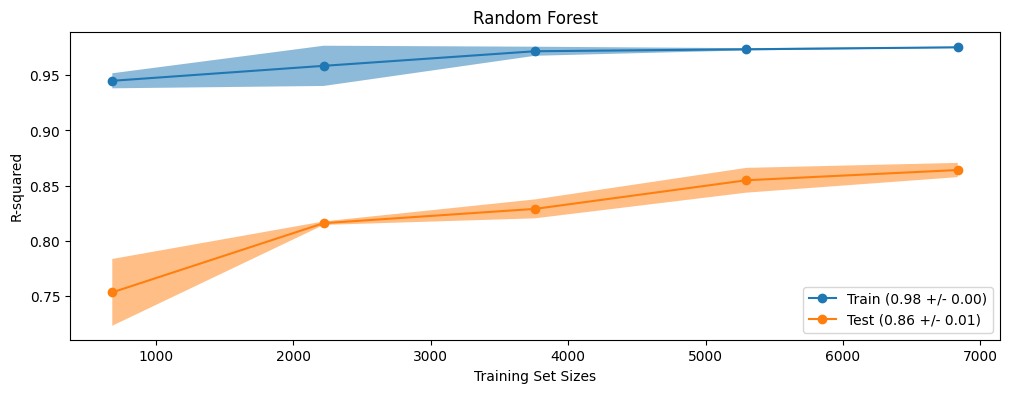

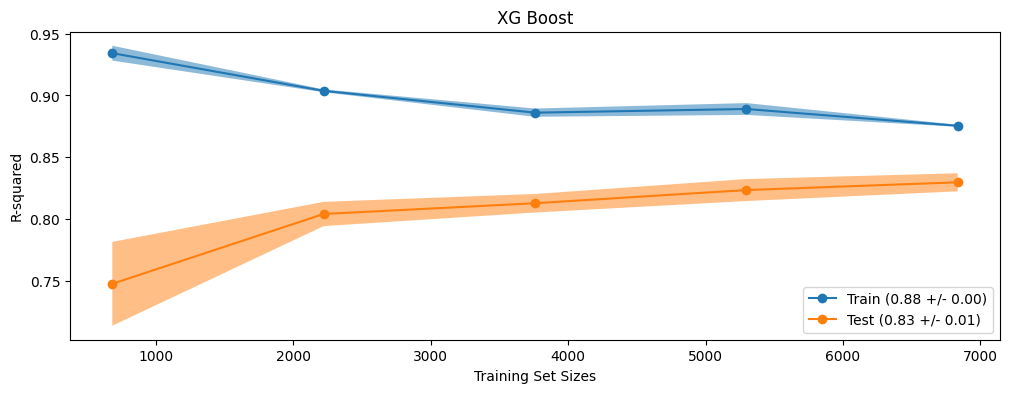

In [20]:
for algo_name, algorithm in algorithms.items():
    plot_learning_curves(algo_name, algorithm)

## Model Training

In [21]:
model = Pipeline(steps=[
    ('preprocessor', preprocessors),
    ('algorithm', RandomForestRegressor(n_estimators=10))
])

In [22]:
model.fit(x_data, y_data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration', 'Total_Stops']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Airline', 'Sou...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Date_of_Journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Dep_Time',
                                                   'Arrival_Time'])])),
                ('algorithm', RandomForestRegressor(n_estimators=10))])

## Model Evaluation

In [23]:
def evaluate_model(x, y):
    y_predict = model.predict(x)
    return r2_score(y, y_predict)

In [24]:
print(f"The R2 score on training data is: {evaluate_model(x_data, y_data)}")
print(f"The R2 score on test data is: {evaluate_model(x_test, y_test)}")

The R2 score on training data is: 0.9766723156015026
The R2 score on test data is: 0.9344515750477851


## Model Persistence

In [25]:
joblib.dump(model, 'models/flight-price-predictor.joblib')

['models/flight-price-predictor.joblib']

In [26]:
saved_model = joblib.load('models/flight-price-predictor.joblib')
saved_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Duration', 'Total_Stops']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Airline', 'Sou...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Date_of_Journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Dep_Time',
                                                   'Arrival_Time'])])),
                ('algorithm', RandomForestRegressor(n_estimators=10))])

In [27]:
y_pred = saved_model.predict(x_test)
r2_score(y_test, y_pred)

0.9344515750477851